In [ ]:
# !pip install keras

In [ ]:
# !pip install tensorflow

In [1]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

In [189]:
# load data and arrange into Pandas dataframe
df = read_csv("/kaggle/input/idmst-fin-6xs/Feb_IDMST_fin.csv")
print(df.head())

# print(df.columns)

labels_All = ["sl.num", "Grid Number", "City name","Road_length", "Alpha", "Beta", "Gamma", "GTP", "Eta", "Network Density ", "Edge Graph Density", "Nodal Graph Density", "population", " CLUMPY ", " AI ", " NLSI"] 

   sl.num Grid Number  City name  Road_length     Alpha      Beta     Gamma  \
0       1          G1  New Delhi  1898.331177  0.918602  2.836868  0.945736   
1       2          G2    Belgaum  1313.717944  0.858968  2.717425  0.905983   
2       3          G3   Gulbarga  1714.513607  0.936320  2.872315  0.957548   
3       4          G4   Jamnagar  1454.757045  0.875269  2.750171  0.916849   
4       5          G5     Dhulia  1164.130948  0.882601  2.764706  0.921738   

        GTP       Eta  Network Density   Edge Graph Density  \
0  1.865741  0.040207         17.513924          435.594397   
1  1.751747  0.046592         11.084396          237.901624   
2  1.901040  0.034193         14.574160          426.230216   
3  1.779538  0.036147         12.764563          353.132911   
4  1.799075  0.038581         10.106350          261.954209   

   Nodal Graph Density       CA   NP     LPI    CLUMPY       AI     NLSI  \
0           153.547625  4054.11  5299  3.7820    0.6808  79.6070  0.20

In [190]:
ND_labels = labels_All.copy()
ND_labels.remove("Network Density ")

df.drop(axis=1, labels=ND_labels, inplace = True)

print(df.head())

   Network Density        CA   NP     LPI 
0         17.513924  4054.11  5299  3.7820
1         11.084396  1534.05  5999  0.2348
2         14.574160  2377.14  5722  0.8446
3         12.764563  2141.93  3003  1.8571
4         10.106350  1608.71  4145  0.6299


In [191]:
df = df.rename(columns={'Network Density ': 'Coverage_ND'})
print(df.describe())

       Coverage_ND           CA           NP         LPI 
count   503.000000   503.000000    503.000000  503.000000
mean      3.783396   879.506104   2554.856859    1.382196
std       3.419194   914.266281   1733.716611    1.866471
min       0.140361    67.180000    371.000000    0.009700
25%       1.522008   302.375000   1329.000000    0.270100
50%       2.523507   549.420000   2096.000000    0.669500
75%       4.802717  1108.195000   3271.500000    1.673950
max      23.743964  5926.080000  12256.000000   15.157200


In [192]:
#Split into features and target (Price)
X = df.drop('Coverage_ND', axis = 1)
y = df['Coverage_ND']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)


#Scale data, otherwise model will fail.
#Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [193]:
# define the model
#Experiment with deeper and wider networks
model = Sequential()
model.add(Dense(128, input_dim=3, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =100)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               512       
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
11/11 [==============================] - 1s 16ms/step - loss: 23.0449 - mae: 3.5388 - val_loss: 20.7447 - val_mae: 3.0321
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 18.1876 - mae: 2.9661 - val_loss: 16.3146 - val_mae: 2.4778
Epoch 3/100
11/11 [==============================

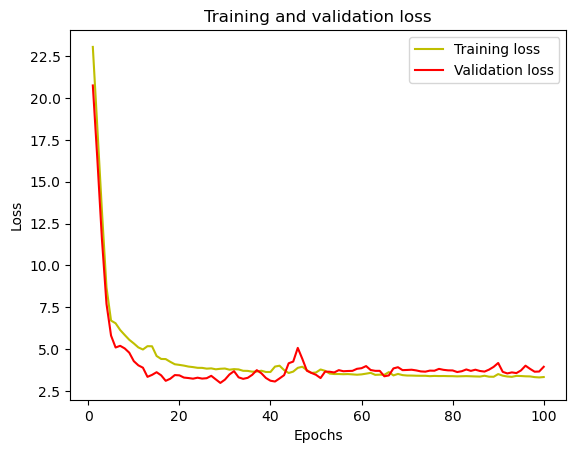

In [194]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

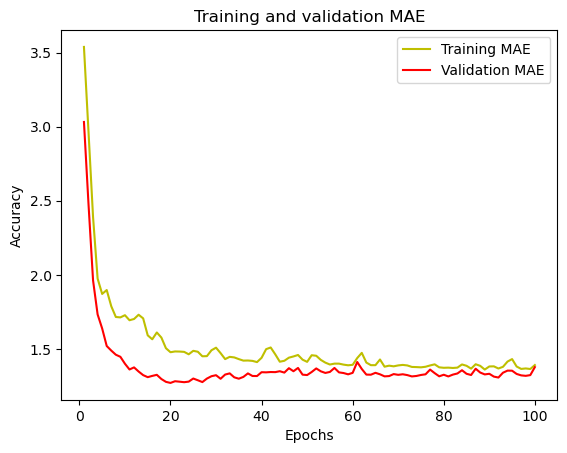

In [195]:
# acc = history.history['mean_absolute_error']
acc = history.history['mae']
# val_acc = history.history['val_mean_absolute_error']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [196]:
#Predict on test data
predictions = model.predict(X_test_scaled[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

1/1 [==============================] - 0s 52ms/step
Predicted values are:  [[1.7755876]
 [3.4130821]
 [2.0926626]
 [2.5360763]
 [3.7157197]]
Real values are:  390    1.989706
147    2.197806
462    1.869550
256    5.516246
182    4.888494
Name: Coverage_ND, dtype: float64


In [197]:
metric_list = ["MSE", "MAE", "R2_Score", "Adj R2", "Defined Score"]

In [198]:
def defined_score(y_pred, y_true):
    error = np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean() ** 0.5
    score = 1 - error
    return score

## NN

In [199]:
NN_acc_list = []

In [200]:
#Predict on test data
predictions = model.predict(X_test_scaled)

4/4 [==============================] - 0s 2ms/step


In [201]:
r2_NN = r2_score(y_test,predictions)

In [202]:
print(r2_NN)

0.6932630215990097


In [203]:
#Comparison with other models..
#Neural network - from the current code
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

4/4 [==============================] - 0s 2ms/step - loss: 3.8720 - mae: 1.5347
Mean squared error from neural net:  3.8720316886901855
Mean absolute error from neural net:  1.534727692604065


In [204]:
N = y_test.shape[0]
p = 5

x = 1-r2_NN
y = (N-1) / (N-p-1)
adj_r2_NN = (1- (x * y))

In [205]:
NN_acc_list.append(mse_neural)
NN_acc_list.append(mae_neural)
NN_acc_list.append(r2_NN)
NN_acc_list.append(adj_r2_NN)

predictions = predictions.reshape(-1)
y_test = y_test.to_numpy()
NN_acc_list.append(defined_score(predictions, y_test))

In [206]:
print(NN_acc_list)

[3.8720316886901855, 1.534727692604065, 0.6932630215990097, 0.6771189701042207, 0.8333355697601552]


## Linear Regression

In [207]:
LR_acc_list = []

In [208]:
#Linear regression
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Linear regression
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)

Mean squared error from linear regression:  4.6400091880842105
Mean absolute error from linear regression:  1.6332786828191233


In [209]:
r2_LR = r2_score(y_test,y_pred_lr)

In [210]:
print(r2_LR)

0.6324249476806908


In [211]:
N = y_test.shape[0]
p = 5

x = 1-r2_LR
y = (N-1) / (N-p-1)
adj_r2_LR = (1- (x * y))

In [212]:
LR_acc_list.append(mse_lr)
LR_acc_list.append(mae_lr)
LR_acc_list.append(r2_LR)
LR_acc_list.append(adj_r2_LR)

y_pred_lr = y_pred_lr.reshape(-1)
LR_acc_list.append(defined_score(y_pred_lr, y_test))

In [214]:
print(LR_acc_list)

[4.6400091880842105, 1.6332786828191233, 0.6324249476806908, 0.613078892295464, 0.8253744088998516]


## Decision Tree

In [215]:
DT_acc_list = []

In [216]:
### Decision tree
tree = DecisionTreeRegressor()
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_tree)
mae_dt = mean_absolute_error(y_test, y_pred_tree)
print('Mean squared error using decision tree: ', mse_dt)
print('Mean absolute error using decision tree: ', mae_dt)

Mean squared error using decision tree:  8.734383204655904
Mean absolute error using decision tree:  2.166492687237624


In [217]:
r2_dt = r2_score(y_test,y_pred_tree)
print(r2_dt)

0.30807435216440315


In [218]:
N = y_test.shape[0]
p = 5

x = 1-r2_dt
y = (N-1) / (N-p-1)
adj_r2_dt = (1- (x * y))

In [219]:
DT_acc_list.append(mse_dt)
DT_acc_list.append(mae_dt)
DT_acc_list.append(r2_dt)
DT_acc_list.append(adj_r2_dt)

y_pred_tree = y_pred_tree.reshape(-1)
DT_acc_list.append(defined_score(y_pred_tree, y_test))

In [220]:
print(DT_acc_list)

[8.734383204655904, 2.166492687237624, 0.30807435216440315, 0.27165721280463495, 0.7658320679837465]


## Random Forest

In [221]:
RF_acc_list = []

In [222]:
#Random forest.
#Increase number of tress and see the effect
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 30, random_state=30)
model.fit(X_train_scaled, y_train)

y_pred_RF = model.predict(X_test_scaled)

mse_RF = mean_squared_error(y_test, y_pred_RF)
mae_RF = mean_absolute_error(y_test, y_pred_RF)
print('Mean squared error using Random Forest: ', mse_RF)
print('Mean absolute error Using Random Forest: ', mae_RF)

Mean squared error using Random Forest:  4.53320697803638
Mean absolute error Using Random Forest:  1.5705172449800335


In [223]:
r2_rf = r2_score(y_test,y_pred_RF)
print(r2_rf)

0.6408856697083466


In [224]:
N = y_test.shape[0]
p = 5

x = 1-r2_rf
y = (N-1) / (N-p-1)
adj_r2_rf = (1- (x * y))

In [225]:
RF_acc_list.append(mse_RF)
RF_acc_list.append(mae_RF)
RF_acc_list.append(r2_rf)
RF_acc_list.append(adj_r2_rf)

y_pred_RF = y_pred_RF.reshape(-1)
RF_acc_list.append(defined_score(y_pred_RF, y_test))

In [226]:
print(RF_acc_list)

[4.53320697803638, 1.5705172449800335, 0.6408856697083466, 0.6219849154824701, 0.8209264851713673]


## XG Boost

In [227]:
XG_acc_list = []

In [228]:
#XG Boost.
import xgboost as xgb
model = xgb.XGBRegressor(max_depth = 100, n_estimators = 1000)

model.fit(X_train_scaled, y_train)

y_pred_XG = model.predict(X_test_scaled)

mse_XG = mean_squared_error(y_test, y_pred_XG)
mae_XG = mean_absolute_error(y_test, y_pred_XG)
print('Mean squared error using XG_Boost: ', mse_XG)
print('Mean absolute error Using XG_Boost: ', mae_XG)

Mean squared error using XG_Boost:  5.343683471854761
Mean absolute error Using XG_Boost:  1.5999460537117591


In [229]:
r2_xg = r2_score(y_test,y_pred_XG)
print(r2_xg)

0.5766808529627434


In [230]:
N = y_test.shape[0]
p = 5

x = 1-r2_xg
y = (N-1) / (N-p-1)
adj_r2_xg = (1- (x * y))

In [231]:
XG_acc_list.append(mse_XG)
XG_acc_list.append(mae_XG)
XG_acc_list.append(r2_xg)
XG_acc_list.append(adj_r2_xg)

y_pred_XG = y_pred_XG.reshape(-1)
XG_acc_list.append(defined_score(y_pred_XG, y_test))

In [232]:
print(XG_acc_list)

[5.343683471854761, 1.5999460537117591, 0.5766808529627434, 0.5544008978555194, 0.812867332853701]


## Linear Gradient Descent

In [241]:
GLB_acc_list1 = []

In [234]:
#Gradient Boost.
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators = 1000, max_depth = 100)

model.fit(X_train_scaled, y_train)

y_pred_GLB = model.predict(X_test_scaled)

mse_GLB = mean_squared_error(y_test, y_pred_GLB)
mae_GLB = mean_absolute_error(y_test, y_pred_GLB)
print('Mean squared error using Gradient Boosting: ', mse_GLB)
print('Mean absolute error Using Gradient Boosting: ', mae_GLB)

Mean squared error using Gradient Boosting:  9.246252282938036
Mean absolute error Using Gradient Boosting:  2.2136346331359524


In [235]:
r2_glb = r2_score(y_test,y_pred_GLB)
print(r2_glb)

0.2675247981433957


In [236]:
N = y_test.shape[0]
p = 5

x = 1-r2_glb
y = (N-1) / (N-p-1)
adj_r2_glb = (1- (x * y))

In [242]:
GLB_acc_list1.append(mse_GLB)
GLB_acc_list1.append(mae_GLB)
GLB_acc_list1.append(r2_glb)
GLB_acc_list1.append(adj_r2_glb)

y_pred_GLB = y_pred_GLB.reshape(-1)
GLB_acc_list1.append(defined_score(y_pred_GLB, y_test))

In [243]:
print(GLB_acc_list1)

[9.246252282938036, 2.2136346331359524, 0.2675247981433957, 0.22897347172989024, 0.7657311480319466]


## Lasso Regression

In [244]:
Lasso_acc_list = []

In [245]:
# Lasso Regression.
from sklearn import linear_model
model = linear_model.Lasso(alpha = 15, max_iter = 1000)

model.fit(X_train_scaled, y_train)

y_pred_Lasso = model.predict(X_test_scaled)

mse_Lasso = mean_squared_error(y_test, y_pred_Lasso)
mae_Lasso = mean_absolute_error(y_test, y_pred_Lasso)
print('Mean squared error using Lasso Regression: ', mse_Lasso)
print('Mean absolute error Using Lasso Regression: ', mae_Lasso)

Mean squared error using Lasso Regression:  12.713652639705641
Mean absolute error Using Lasso Regression:  2.569652109640732


In [246]:
r2_Lasso = r2_score(y_test,y_pred_Lasso)
print(r2_Lasso)

-0.007157819042773683


In [247]:
N = y_test.shape[0]
p = 5

x = 1-r2_Lasso
y = (N-1) / (N-p-1)
adj_r2_Lasso = (1- (x * y))

In [248]:
Lasso_acc_list.append(mse_Lasso)
Lasso_acc_list.append(mae_Lasso)
Lasso_acc_list.append(r2_Lasso)
Lasso_acc_list.append(adj_r2_Lasso)

y_pred_Lasso = y_pred_Lasso.reshape(-1)
Lasso_acc_list.append(defined_score(y_pred_Lasso, y_test))

In [249]:
print(Lasso_acc_list)

[12.713652639705641, 2.569652109640732, -0.007157819042773683, -0.06016612530818266, 0.7351504990288379]


## Ridge Regression

In [250]:
Ridge_acc_list = []

In [251]:
# Ridge Regression.
from sklearn.linear_model import Ridge
model = Ridge(alpha = 20, max_iter = 1000)

model.fit(X_train_scaled, y_train)

y_pred_Ridge = model.predict(X_test_scaled)

mse_Ridge = mean_squared_error(y_test, y_pred_Ridge)
mae_Ridge = mean_absolute_error(y_test, y_pred_Ridge)
print('Mean squared error using Ridge Regression: ', mse_Ridge)
print('Mean absolute error Using Ridge Regression: ', mae_Ridge)

Mean squared error using Ridge Regression:  4.206869165151733
Mean absolute error Using Ridge Regression:  1.5555017402222149


In [252]:
r2_Ridge = r2_score(y_test,y_pred_Ridge)
print(r2_Ridge)

0.6667376958105556


In [253]:
N = y_test.shape[0]
p = 5

x = 1-r2_Ridge
y = (N-1) / (N-p-1)
adj_r2_Ridge = (1- (x * y))

In [254]:
Ridge_acc_list.append(mse_Ridge)
Ridge_acc_list.append(mae_Ridge)
Ridge_acc_list.append(r2_Ridge)
Ridge_acc_list.append(adj_r2_Ridge)

y_pred_Ridge = y_pred_Ridge.reshape(-1)
Ridge_acc_list.append(defined_score(y_pred_Ridge, y_test))

In [255]:
print(Ridge_acc_list)

[4.206869165151733, 1.5555017402222149, 0.6667376958105556, 0.649197574537427, 0.8309637330880483]


## Support Vector Regression

In [256]:
SV_acc_list = []

In [257]:
# Support Vector Regression.
from sklearn.svm import SVR
model = SVR(kernel = "rbf", max_iter = 100)

model.fit(X_train_scaled, y_train)

y_pred_SV = model.predict(X_test_scaled)

mse_SV = mean_squared_error(y_test, y_pred_SV)
mae_SV = mean_absolute_error(y_test, y_pred_SV)
print('Mean squared error using Support Vector Regression: ', mse_SV)
print('Mean absolute error Using Support vector Regression: ', mae_SV)

Mean squared error using Support Vector Regression:  6.084481204086193
Mean absolute error Using Support vector Regression:  1.7252160972316155


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


In [258]:
r2_SV = r2_score(y_test,y_pred_SV)
print(r2_SV)

0.5179958904669208


In [259]:
N = y_test.shape[0]
p = 5

x = 1-r2_SV
y = (N-1) / (N-p-1)
adj_r2_SV = (1- (x * y))

In [260]:
SV_acc_list.append(mse_SV)
SV_acc_list.append(mae_SV)
SV_acc_list.append(r2_SV)
SV_acc_list.append(adj_r2_SV)

y_pred_SV = y_pred_SV.reshape(-1)
SV_acc_list.append(defined_score(y_pred_SV, y_test))

In [261]:
print(SV_acc_list)

[6.084481204086193, 1.7252160972316155, 0.5179958904669208, 0.49262725312307465, 0.8151848441791789]


# Kernel Ridge

In [263]:
KR_acc_list = []

In [264]:
from sklearn.kernel_ridge import KernelRidge
model = KernelRidge(alpha=0.2 ,kernel = 'rbf')

model.fit(X_train_scaled, y_train)

y_pred_KR = model.predict(X_test_scaled)

mse_KR = mean_squared_error(y_test, y_pred_KR)
mae_KR = mean_absolute_error(y_test, y_pred_KR)
print('Mean squared error using Kernel Ridge Regression: ', mse_KR)
print('Mean absolute error Using Kernel Ridge Regression: ', mae_KR)

Mean squared error using Kernel Ridge Regression:  5.159536169125466
Mean absolute error Using Kernel Ridge Regression:  1.6333132471666094


In [265]:
r2_KR = r2_score(y_test,y_pred_KR)
print(r2_KR)

0.5912687452904152


In [266]:
N = y_test.shape[0]
p = 5

x = 1-r2_KR
y = (N-1) / (N-p-1)
adj_r2_KR = (1- (x * y))

In [267]:
KR_acc_list.append(mse_KR)
KR_acc_list.append(mae_KR)
KR_acc_list.append(r2_KR)
KR_acc_list.append(adj_r2_KR)

y_pred_KR = y_pred_KR.reshape(-1)
KR_acc_list.append(defined_score(y_pred_KR, y_test))

In [268]:
print(KR_acc_list)

[5.159536169125466, 1.6333132471666094, 0.5912687452904152, 0.5697565739899108, 0.8182518136680028]


# MLP Regressor

In [269]:
MLP_acc_list = []

In [270]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(alpha = 0.0001, max_iter=1000, activation = 'relu', solver = 'adam')

model.fit(X_train_scaled, y_train)

y_pred_MLP = model.predict(X_test_scaled)

mse_MLP = mean_squared_error(y_test, y_pred_MLP)
mae_MLP = mean_absolute_error(y_test, y_pred_MLP)
print('Mean squared error using Multi Layered Perceptron Regression: ', mse_MLP)
print('Mean absolute error Using Multi Layered Perceptron Regression: ', mae_MLP)

Mean squared error using Multi Layered Perceptron Regression:  3.985086332539104
Mean absolute error Using Multi Layered Perceptron Regression:  1.5074213285643676


In [271]:
r2_MLP = r2_score(y_test,y_pred_MLP)
print(r2_MLP)

0.6843070222917325


In [272]:
N = y_test.shape[0]
p = 5

x = 1-r2_MLP
y = (N-1) / (N-p-1)
adj_r2_MLP = (1- (x * y))

In [273]:
MLP_acc_list.append(mse_MLP)
MLP_acc_list.append(mae_MLP)
MLP_acc_list.append(r2_MLP)
MLP_acc_list.append(adj_r2_MLP)

y_pred_MLP = y_pred_KR.reshape(-1)
MLP_acc_list.append(defined_score(y_pred_MLP, y_test))

In [274]:
print(MLP_acc_list)

[3.985086332539104, 1.5074213285643676, 0.6843070222917325, 0.66769160241235, 0.8182518136680028]


## Putting the Data

In [275]:
import pandas as pd

In [277]:
Final_df = pd.DataFrame(metric_list, columns=['Network Density_Results_3Xs'])

In [278]:
print(Final_df)

  Network Density_Results_3Xs
0                         MSE
1                         MAE
2                    R2_Score
3                      Adj R2
4               Defined Score


In [280]:
Final_df["Neural Network"] = NN_acc_list
Final_df["Linear Regression"] = LR_acc_list
Final_df["Decision Tree"] = DT_acc_list
Final_df["Random Forest"] = RF_acc_list
Final_df["XG Boost"] = XG_acc_list
Final_df["Gradient Boosting"] = GLB_acc_list1
Final_df["Lasso Regression"] = Lasso_acc_list
Final_df["Ridge Regression"] = Ridge_acc_list
Final_df["Support vector Regression"] = SV_acc_list
Final_df["Kernal Ridge Regression"] = KR_acc_list
Final_df["MLP Regression"] = MLP_acc_list

In [281]:
print(Final_df)

  Network Density_Results_3Xs  Neural Network  Linear Regression  \
0                         MSE        3.872032           4.640009   
1                         MAE        1.534728           1.633279   
2                    R2_Score        0.693263           0.632425   
3                      Adj R2        0.677119           0.613079   
4               Defined Score        0.833336           0.825374   

   Decision Tree  Random Forest  XG Boost  Gradient Boosting  \
0       8.734383       4.533207  5.343683           9.246252   
1       2.166493       1.570517  1.599946           2.213635   
2       0.308074       0.640886  0.576681           0.267525   
3       0.271657       0.621985  0.554401           0.228973   
4       0.765832       0.820926  0.812867           0.765731   

   Lasso Regression  Ridge Regression  Support vector Regression  \
0         12.713653          4.206869                   6.084481   
1          2.569652          1.555502                   1.725216   
2 

In [282]:
Final_df.to_csv('ND_Results_3Xs_metrics.csv', index = False)

In [ ]:
# #Feature ranking...
# import pandas as pd
# feature_list = list(X.columns)
# feature_imp = pd.Series(model.feature_importances_, index=feature_list).sort_values(ascending=False)
# print(feature_imp)